## Fifa 20 

<img src="fifa.jpg">

Esta practica consiste en realizar una pequeña limpieza o depuracion de los datos del dataset que contiene las caracteristicas de los jugadores en el juego de FIFA 20 contenido en https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("players_20.csv")
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [3]:
print(df.shape)
print(df.dtypes)

(18278, 104)
sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object


In [4]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['sofifa_id' 'age' 'height_cm' 'weight_kg' 'overall' 'potential'
 'value_eur' 'wage_eur' 'international_reputation' 'weak_foot'
 'skill_moves' 'release_clause_eur' 'team_jersey_number'
 'contract_valid_until' 'nation_jersey_number' 'pace' 'shooting' 'passing'
 'dribbling' 'defending' 'physic' 'gk_diving' 'gk_handling' 'gk_kicking'
 'gk_reflexes' 'gk_speed' 'gk_positioning' 'attacking_crossing'
 'attacking_finishing' 'attacking_heading_accuracy'
 'attacking_short_passing' 'attacking_volleys' 'skill_dribbling'
 'skill_curve' 'skill_fk_accuracy' 'skill_long_passing'
 'skill_ball_control' 'movement_acceleration' 'movement_sprint_speed'
 'movement_agility' 'movement_reactions' 'movement_balance'
 'power_shot_power' 'power_jumping' 'power_stamina' 'power_strength'
 'power_long_shots' 'mentality_aggression' 'mentality_interceptions'
 'mentality_positioning' 'mentality_vision' 'mentality_penalties'
 'mentality_composure' 'defending_marking' 'defending_standing_tackle'
 'defending_sliding_tackl

In [5]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['player_url' 'short_name' 'long_name' 'dob' 'nationality' 'club'
 'player_positions' 'preferred_foot' 'work_rate' 'body_type' 'real_face'
 'player_tags' 'team_position' 'loaned_from' 'joined' 'nation_position'
 'player_traits' 'ls' 'st' 'rs' 'lw' 'lf' 'cf' 'rf' 'rw' 'lam' 'cam' 'ram'
 'lm' 'lcm' 'cm' 'rcm' 'rm' 'lwb' 'ldm' 'cdm' 'rdm' 'rwb' 'lb' 'lcb' 'cb'
 'rcb' 'rb']


Se revisó que el conjunto de datos tiene 18,278 observaciones y 104 características. También se identificaron las características numéricas o categóricas

### Datos faltantes 

#### Técnica #1: mapa de calor de los datos faltantes 

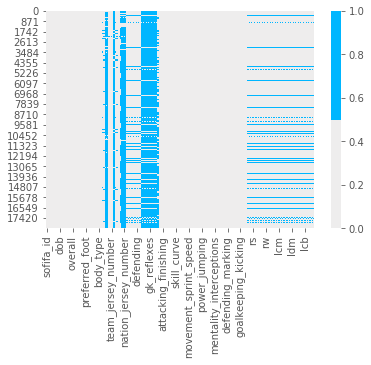

In [6]:
cols = df.columns
colours = ['#EEEDED', '#00B6FF'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

#### Técnica #2: Lista de porcentaje de datos faltantes 

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if (pct_missing > 0):
        print('{} - {}%'.format(col, round(pct_missing*100)))

release_clause_eur - 7.0%
player_tags - 92.0%
team_position - 1.0%
team_jersey_number - 1.0%
loaned_from - 94.0%
joined - 7.0%
contract_valid_until - 1.0%
nation_position - 94.0%
nation_jersey_number - 94.0%
pace - 11.0%
shooting - 11.0%
passing - 11.0%
dribbling - 11.0%
defending - 11.0%
physic - 11.0%
gk_diving - 89.0%
gk_handling - 89.0%
gk_kicking - 89.0%
gk_reflexes - 89.0%
gk_speed - 89.0%
gk_positioning - 89.0%
player_traits - 59.0%
ls - 11.0%
st - 11.0%
rs - 11.0%
lw - 11.0%
lf - 11.0%
cf - 11.0%
rf - 11.0%
rw - 11.0%
lam - 11.0%
cam - 11.0%
ram - 11.0%
lm - 11.0%
lcm - 11.0%
cm - 11.0%
rcm - 11.0%
rm - 11.0%
lwb - 11.0%
ldm - 11.0%
cdm - 11.0%
rdm - 11.0%
rwb - 11.0%
lb - 11.0%
lcb - 11.0%
cb - 11.0%
rcb - 11.0%
rb - 11.0%


Muestra el porcentaje de valores faltantes para cada una de las caracteristicas, por ejemplo vemos que player_tags tiene el 92.0% de datos faltantes y nation_position tiene el 94.0% siendo las caracteristicas que presentan mas faltas y varias depende de las pocisiones de los jugadores siendo el 11% guardametas

#### Técnica #3: Histograma de datos faltantes 

In [8]:
aux = df.copy()

created missing indicator for: release_clause_eur
created missing indicator for: player_tags
created missing indicator for: team_position
created missing indicator for: team_jersey_number
created missing indicator for: loaned_from
created missing indicator for: joined
created missing indicator for: contract_valid_until
created missing indicator for: nation_position
created missing indicator for: nation_jersey_number
created missing indicator for: pace
created missing indicator for: shooting
created missing indicator for: passing
created missing indicator for: dribbling
created missing indicator for: defending
created missing indicator for: physic
created missing indicator for: gk_diving
created missing indicator for: gk_handling
created missing indicator for: gk_kicking
created missing indicator for: gk_reflexes
created missing indicator for: gk_speed
created missing indicator for: gk_positioning
created missing indicator for: player_traits
created missing indicator for: ls
created mis

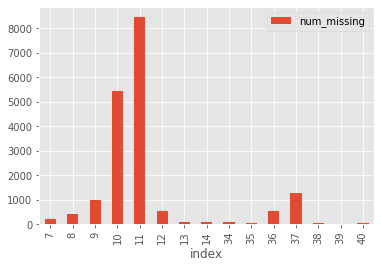

In [9]:
for col in aux.columns:
    missing = aux[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        aux['{}_ismissing'.format(col)] = missing
        
# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in aux.columns if 'ismissing' in col]
aux['num_missing'] = aux[ismissing_cols].sum(axis=1)

aux['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Podemos identificar que de las 18,278 mas de 8000 presentan 11 valores perdidos mientras que 5500 presentan 10

### Analisis de las caracteristicas

#### Técnica #1: Histograma y Box Plot

Cuando la característica es numérica, podemos usar un histograma y un box plot para detectar los valores atípicos

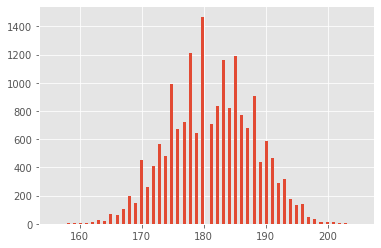

In [10]:
df['height_cm'].hist(bins=100)

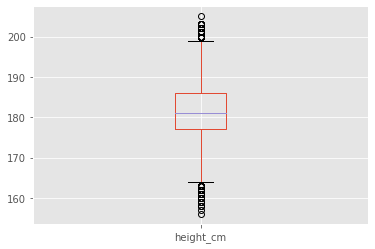

In [11]:
df.boxplot(column=['height_cm'])

#### Técnica #3: Estadística descriptiva 

In [12]:
df['height_cm'].describe()

count    18278.000000
mean       181.362184
std          6.756961
min        156.000000
25%        177.000000
50%        181.000000
75%        186.000000
max        205.000000
Name: height_cm, dtype: float64

#### Técnica #3: Gráfico de barras 

Cuando la característica es categórica podemos usar un gráfico de barras para aprender sobre sus categorías y distribución

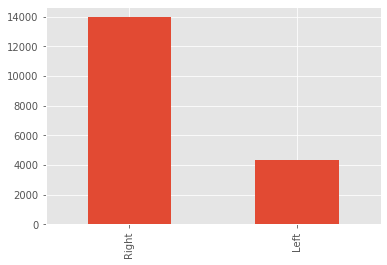

In [13]:
df['preferred_foot'].value_counts().plot.bar()

### Datos innecesarios 

#### Tipo innecesario #1: Deinformativo / Repetitivo 

In [14]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.90:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

international_reputation: 91.88095%
1    16794
2     1140
3      292
4       46
5        6
Name: international_reputation, dtype: int64

player_tags: 91.79888%
NaN                                                                                16779
#Strength                                                                            514
#Acrobat                                                                             238
#Engine                                                                              209
#Speedster                                                                           156
                                                                                   ...  
#Dribbler, #Crosser, #Acrobat                                                          1
#Aerial Threat, #Tackling , #Strength                                                  1
#Dribbler, #Acrobat, #Clinical Finisher, #Complete Forward                             1
#Acrobat, #Clinical Finisher           

Podemos crear una lista de características con un alto porcentaje del mismo valor.Por ejemplo la mayoria tiene una reputación internacional de 1, además podemos ver que player_tags, nation_jersey_number, loaned_from, player_tags la mayoria de las observaciones son datos faltantes

#### Tipo innecesario #2:Irrelevante 

En este tipo de datos innecesario depende del problema que estamos tratando de resolver para decidir si una caracteristica es irrelevante o no

#### Tipo innecesario #3: Duplicados 

#####  Duplicados tipo #1: todas las características

In [15]:
df_dedupped = df.drop(['sofifa_id'], axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(18278, 104)
(18278, 103)


No se tiene datos duplicados del tipo 1

##### Duplicados tipo #2: características claves

In [16]:
key = ['long_name','dob']
df.fillna(-999).groupby(key)['sofifa_id'].count().sort_values(ascending=False).head(20)

long_name                          dob       
황희찬 黄喜灿                            1996-01-26    1
Gonzalo Verón                      1989-12-24    1
Gonzalo Montiel                    1997-01-01    1
Gonzalo Nicolás Martínez           1993-06-13    1
Gonzalo Pablo Castellani           1987-08-10    1
Gonzalo Piovi                      1994-09-08    1
Gonzalo Plata                      2000-11-01    1
Gonzalo Rehak                      1993-04-11    1
Gonzalo Villar del Fraile          1998-03-23    1
Gonzalo Julián Melero Manzanares   1994-01-02    1
Gonzalo Ávila Gordón               1998-01-26    1
Gonçalo Alexandre Glórias Tavares  1997-05-16    1
Gonçalo Bento Soares Cardoso       2000-10-21    1
Gonçalo Domingues Agrelos          1998-02-18    1
Gonçalo Filipe Oliveira Silva      1991-06-04    1
Gonçalo Manuel Ganchinho Guedes    1996-11-29    1
Gonzalo Maroni                     1999-03-18    1
Gonzalo Javier Rodríguez           1984-04-10    1
Gonçalo Rosa Pereira Rodrigues     1

La probabilidad de que dos jugadores tengan el mismo nombre y la misma fecha de nacimiento como en este dataset

### Datos inconsistentes 

####  Tipo inconsistente #1: Capitalización

El uso inconsistente de las mayúsculas y minúsculas en los valores categóricos es un error común. Podría causar problemas ya que los análisis en Python son sensibles a las mayúsculas y minúsculas, para este dataset revisaremos las caracteristicas long_name,nationality,club

In [17]:
var = ['long_name','nationality','club']

In [31]:
for i in var:
    print(df[i].value_counts(dropna=False)[:10])

Liam Kelly                3
Danny Ward                2
Michael Rose              2
Daniel Jones              2
Javier López Rodríguez    2
Ethan Ross                2
Michael Smith             2
Andrei Cristea            2
Rodrigo González          2
Tobias Müller             2
Name: long_name, dtype: int64
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64
Aston Villa                 33
SC Paderborn 07             33
Atlético Madrid             33
Hertha BSC                  33
Deportivo Alavés            33
Lazio                       33
Norwich City                33
Borussia Mönchengladbach    33
Sevilla FC                  33
Fortuna Düsseldorf          33
Name: club, dtype: int64


In [19]:
aux = df[var].copy()

In [20]:
for i in var:
    aux[i] = df[i].str.lower()
    print(aux[i].value_counts(dropna=False))

liam kelly                    3
ben davies                    2
李帅                            2
michael kelly                 2
ladislav krejčí               2
                             ..
chris neal                    1
joe widdowson                 1
jamie proctor                 1
jonathan silva                1
omar israel mendoza martín    1
Name: long_name, Length: 18218, dtype: int64
england           1667
germany           1216
spain             1035
france             984
argentina          886
                  ... 
chinese taipei       1
chad                 1
south sudan          1
vietnam              1
indonesia            1
Name: nationality, Length: 162, dtype: int64
sc paderborn 07               33
bournemouth                   33
manchester city               33
vfl wolfsburg                 33
watford                       33
                              ..
netherlands                    1
canada                         1
us orléans loiret football     1
gif sund

#### Tipo inconsistente #2: Formatos 

Otra estandarización que debemos realizar es la de los formatos de datos. Un ejemplo es convertir una característica que incluya una fecha al formato DateTime.

In [21]:
df.dob.value_counts()

1992-02-29    113
1984-02-29    111
1988-02-29    110
1997-01-01     15
2001-01-01     13
             ... 
1994-12-10      1
1982-09-09      1
2000-06-14      1
1980-08-20      1
1985-10-07      1
Name: dob, Length: 6142, dtype: int64

In [22]:
df.dob.describe()

count          18278
unique          6142
top       1992-02-29
freq             113
Name: dob, dtype: object

In [23]:
df['dob'] = pd.to_datetime(df['dob'],format='%Y-%m-%d')

In [27]:
df[['dob']].dtypes

dob    datetime64[ns]
dtype: object

#### Tipo inconsistente #3: Valores categóricos

In [38]:
nacionalidades = ['England','Germany','Spain','France','Argentina']

In [42]:
df_nationality = pd.DataFrame(data = {'nationality': list(df.nationality)})

In [45]:
from nltk.metrics import edit_distance
for i in nacionalidades:
    df_nationality['nac_distance_'+str(i)] = df_nationality['nationality'].map(lambda x: edit_distance(x,i))

In [46]:
df_nationality

,nationality,nac_distance_England,nac_distance_Germany,nac_distance_Spain,nac_distance_France,nac_distance_Argentina
0,Argentina,7,7,7,7,0
1,Portugal,8,7,8,7,8
2,Brazil,7,6,4,4,7
3,Slovenia,7,7,6,7,6
4,Belgium,7,6,6,7,7
...,...,...,...,...,...,...
18273,China PR,7,7,7,7,8
18274,China PR,7,7,7,7,8
18275,China PR,7,7,7,7,8
18276,China PR,7,7,7,7,8


#### Tipo inconsistente #4: Direcciones

La característica de la dirección podría ser un dolor de cabeza para muchos de nosotros. Porque la gente que introduce los datos en la base de datos a menudo no sigue un formato estándar sin embargo no contenemos direcciones en este dataset 